In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import langevin_cached_model as lcm
import pymc3 as pm
import scipy.io

In [58]:
oxy_data37=scipy.io.loadmat('OXY37_MRI_1_ts.mat')

mean:  -1.13130760798e-12
var:  371.985450742
N:  736


(736,)

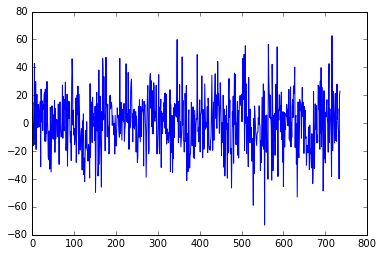

In [59]:
mpfc_r_ts=oxy_data37['mpfc_r_ts']
plt.plot(mpfc_r_ts[0])
print("mean: ",mpfc_r_ts[0].mean())
print("var: ",mpfc_r_ts[0].std()**2)
N=len(mpfc_r_ts[0])
print("N: ",N)
mpfc_r_ts[0].shape

In [60]:
# initial prior
# both D and A have mean 1 and std 10
alpha_A=400.0/16.0
beta_A=1.0/16.0
alpha_N=400.0/16.0
beta_N=1.0/16.0
alpha_D=2.0+1.0/1.6
beta_D=100*(alpha_D-1)
delta_t=0.802

In [61]:
# compile model for reuse
sm = lcm.LangevinPlusNoiseIG()
sm.samples=10000

In [62]:
trace = sm.run(x=mpfc_r_ts[0],
                aD=alpha_D,
                bD=beta_D,
                aA=alpha_A,
                bA=beta_A,
                aN=alpha_N,
                bN=beta_N,
                delta_t=delta_t,
                N=N)

Applied log-transform to D and added transformed D_log_ to model.
Applied log-transform to A and added transformed A_log_ to model.
Applied log-transform to sN and added transformed sN_log_ to model.


TypeError: Expected int elements in shape

In [ ]:
pm.traceplot(trace)

In [ ]:
pm.summary(trace)